In [1]:
import thinkstats2
import nsfg
import thinkplot

In [2]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
print(pmf)

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})


In [3]:
pmf.Incr(2, 0.2)
pmf.Prob(2)

0.6000000000000001

In [4]:
pmf.Mult(2, 0.5)
pmf.Prob(2)

0.30000000000000004

In [5]:
pmf.Total()

0.8999999999999999

In [6]:
pmf.Normalize()
pmf.Total()

1.0

In [7]:
#using default dataset 2002FemPreg.dat
preg = nsfg.ReadFemPreg() 
live = preg[preg.outcome==1]
# Divide the data into first babies and the others
live_ft = live[live.prglngth>=26]
live_ft = live_ft[live_ft.prglngth<=46]
firsts = live_ft[live_ft.birthord==1]
others = live_ft[live_ft.birthord!=1]

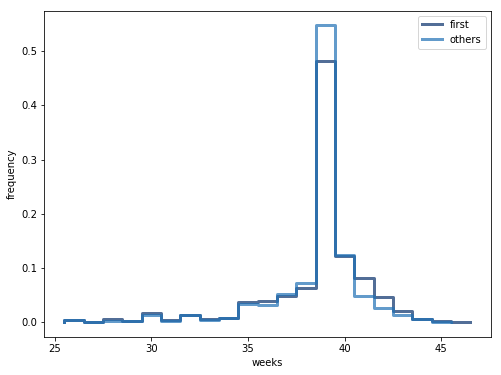

In [11]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='first')
others_pmf = thinkstats2.Pmf(others.prglngth, label='others')
thinkplot.Pmf(first_pmf)
thinkplot.Pmf(others_pmf)
thinkplot.Show(xlabel='weeks', ylabel='frequency')

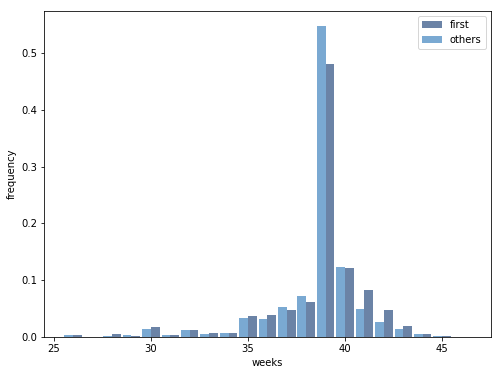

In [13]:
thinkplot.Hist(first_pmf, align='left', width=0.45)
thinkplot.Hist(others_pmf, align='right', width=0.45)
thinkplot.Show(xlabel='weeks', ylabel='frequency')

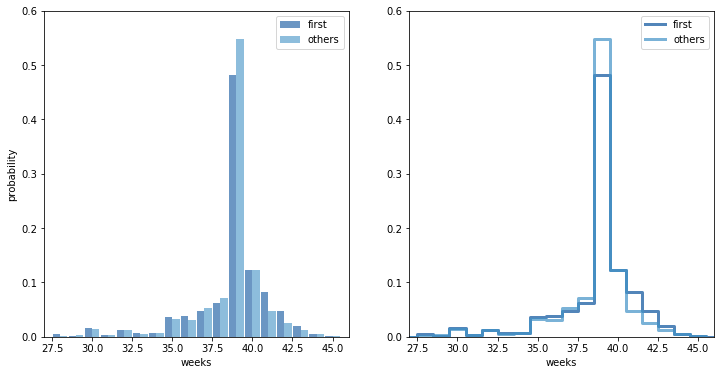

In [22]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=0.45)
thinkplot.Hist(others_pmf, align='left', width=0.45)
thinkplot.Config(xlabel='weeks', ylabel='probability', axis=[27, 46, 0, 0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, others_pmf])
thinkplot.Show(xlabel='weeks', axis=[27, 46, 0, 0.6])

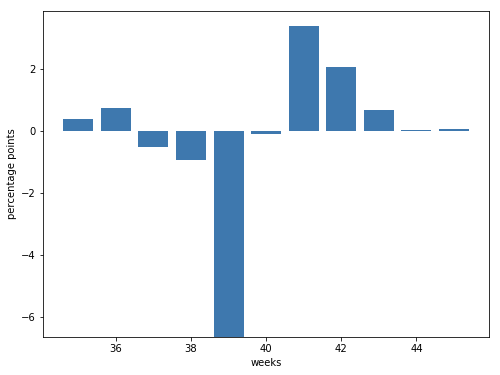

In [25]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = others_pmf.Prob(week)
    diff = 100*(p1 - p2)
    diffs.append(diff)
    
thinkplot.Bar(weeks, diffs)
thinkplot.Show(xlabel='weeks',  ylabel='percentage points')